# Space Mission Launches Data Analytics Project

##### *by Franco Maldonado*

This is part of Space Mission Launches Data Analytics Data: Cleaning, analysis and visualization
and this workbook has been created to document the entire process of data analysis, cleaning and visualization, and to show the skills and tools to be used. 

## Project background

I Worked with an incredibly rich dataset from nextspaceflight.com that includes all space missions since the beginning of the US-Soviet space race in 1957. 
It contains data on mission status (success/failure), mission cost, number of launches per country and much more. There is much we can learn from this data set about dominant organizations and trends over time.

# Ask
#### Objectives:

  1. Which organization launched the most space missions in a given year?
  2. How many launches were performed per year? 
  3. How has the cost of a space mission varied over time?
  4. What months are the most popular for launches? 
  5. Have space missions become safer or have the chances of failure remained unchanged?
  
**Business task :** Develop a report detailing trends and patterns in space mission launches to improve future launch planning and strategy. This report should help identify optimal periods for launching missions, assess cost trends, and improve mission safety.


# Prepare

#### Objectives:

  1. Download  data and store it appropriately.
  2. Identify how it's organized
  3. Sort and filter the data

The data set that is being used for this project is the [Space Mission Launches](https://www.kaggle.com/datasets/sefercanapaydn/mission-launches) that is hosted on the Kaggle platform as a public dataset. 

Limitations of data:
   1. Data is collected back in 2022, it is not current
  

# Process
#### Objectives:
# 1. Check the data for errors
2. Choose your tools
3. Transform the data so you can work with it effectively
4. Document the cleaning process

The tool I decided to use is the Python language. This is because the data set is very large and cannot be handled efficiently by spreadsheets. On the other hand, using SQL would force us to load the data into BigQuery or employ other additional software. With Python, on the other hand, we can document, process, analyze and visualize our data in a single environment.


In [ ]:
# Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1- Which organization launched the most missions in a given year?** ** For this question, we must count the number of launches by organization and year.
**For this question, we must count the number of launches by organization and year, and then identify the organization with the maximum number of launches for each year.**

In [ ]:
# Make sure the date column is in datetime format.
df['Date'] = pd.to_datetime(df['Date'])
# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

In [ ]:
# Count the number of launches per organization and year
launches_per_year_org = df.groupby(['Year', 'Organisation']).size().reset_index(name='Launches')

# Identify the organization with the maximum number of launches per year.
top_org_per_year = launches_per_year_org.loc[launches_per_year_org.groupby('Year')['Launches'].idxmax()]

print(top_org_per_year)

# 2- How many launches were made per year?
**For this, we simply count the total number of launches per year**.

In [ ]:
# Count the number of launches per year
launches_per_year = df.groupby('Year').size().reset_index(name='Launches')

print(launches_per_year)

# 3- How has the cost of a space mission varied over time?
**Let's analyze the Price column and see how it has changed over the years. For this, we need to calculate the average cost per year**.

In [ ]:
# Make sure that the Price column is in numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Calculate the average cost of missions per year
average_cost_per_year = df.groupby('Year')['Price'].mean().reset_index()

print(average_cost_per_year)

*      Year  Launches
* 0   1957.0         3
* 1   1958.0        22
* 2   1959.0        20
* 3   1960.0        38
* 4   1961.0        52
* ..     ...       ...
* 59  2016.0        88
* 60  2017.0        90
* 61  2018.0       117
* 62  2019.0       107
* 63  2020.0        63
* 
* [64 rows x 2 columns]

# 4- What are the most popular months for launches?
**For this, we extract the month from the date column and count the number of launches per month **.

In [ ]:
# Extract the month from the Date column
df['Month'] = df['Date'].dt.month

# Count the number of launches per month
launches_per_month = df.groupby('Month').size().reset_index(name='Launches')

print(launches_per_month)

*     Month  Launches
* 0     1.0       265
* 1     2.0       323
* 2     3.0       349
* 3     4.0       366
* 4     5.0       320
* 5     6.0       386
* 6     7.0       347
* 7     8.0       358
* 8     9.0       354
* 9    10.0       375
* 10   11.0       325
* 11   12.0       430

# 5- Have space missions become safer or have the failure probabilities remained unchanged?
**To answer this question, let's analyze the Mission_Status column and calculate the success and failure rate per year **.

In [ ]:
# Count the number of successes and failures per year.
mission_status_per_year = df.groupby(['Year', 'Mission_Status']).size().unstack(fill_value=0).reset_index()

print(mission_status_per_year)

* Mission_Status    Year  Failure  Partial Failure  Prelaunch Failure  Success
* 0               1957.0        1                0                  0        2
* 1               1958.0       14                2                  0        6
* 2               1959.0        9                3                  0        8
* 3               1960.0       19                0                  0       19
* 4               1961.0       17                3                  0       32
* ..                 ...      ...              ...                ...      ...
* 59              2016.0        2                1                  1       84
* 60              2017.0        5                2                  0       83
* 61              2018.0        2                2                  0      113
* 62              2019.0        5                2                  0      100
* 63              2020.0        6                0                  0       57
* 
* [64 rows x 5 columns]


# Visualization
**For a better understanding, we can visualize the results using matplotlib and seaborn.**
The data cleaning and transformation is now complete. Let's proceed to analyze the data we have.
# Analyze | Share
#### Exploratory data analysis (EDA):
1. Which organization launched the most space missions in a given year?.
2. How many launches were performed per year? 
3. How has the cost of a space mission varied over time?
4. What months are the most popular for launches? 
5. Have space missions become safer or have the chances of failure remained unchanged? 
**Business task :** Develop a report detailing trends and patterns in space mission launches to improve future launch planning and strategy. This report should help identify optimal periods for launching missions, assess cost trends, and improve mission safety.



In [ ]:
# Visualization of the organization with the most launches per year
plt.figure(figsize=(14, 7))
sns.barplot(x='Year', y='Launches', hue='Organisation', data=top_org_per_year)
plt.title('Top Organisation by Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.legend(title='Organisation')
plt.show()

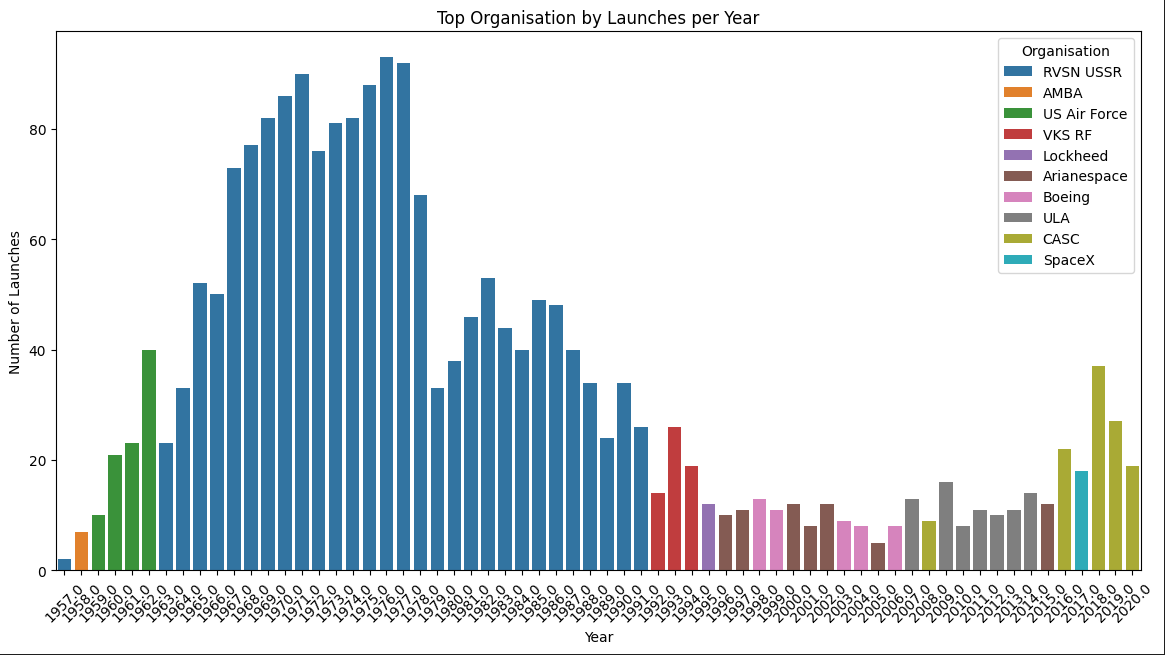

In [ ]:
# Visualización de lanzamientos por año
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Launches', data=launches_per_year)
plt.title('Number of Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.show()


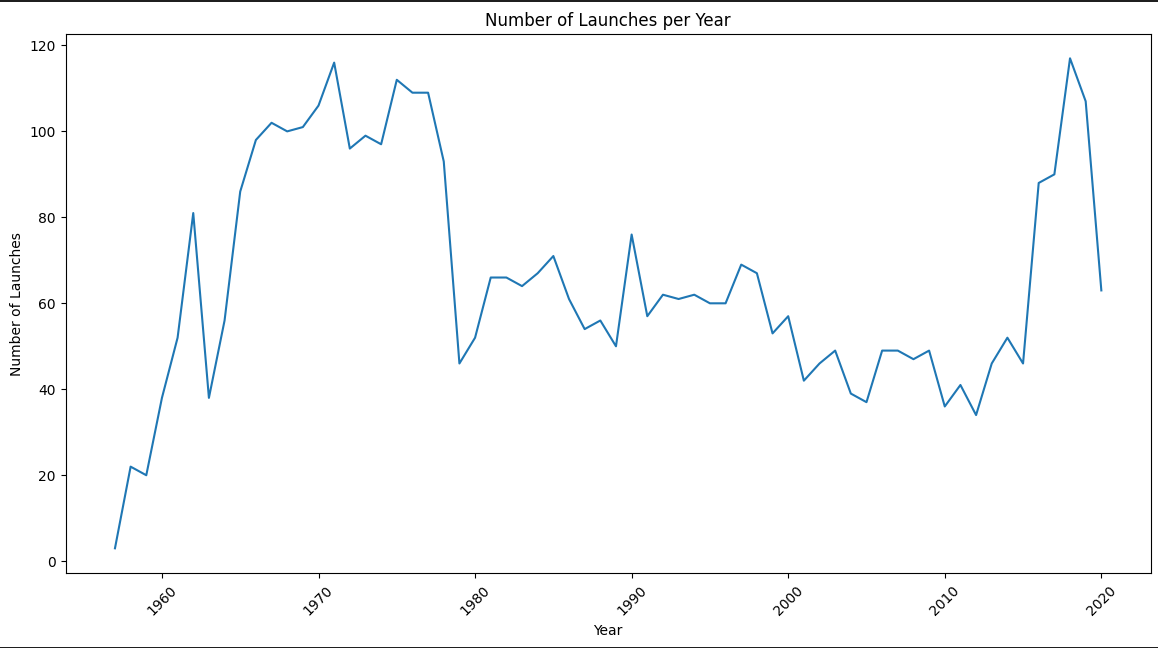

In [ ]:
# Display of the average cost of missions per year
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Price', data=average_cost_per_year)
plt.title('Average Cost of Space Missions per Year')
plt.xlabel('Year')
plt.ylabel('Average Cost (in million $)')
plt.xticks(rotation=45)
plt.show()

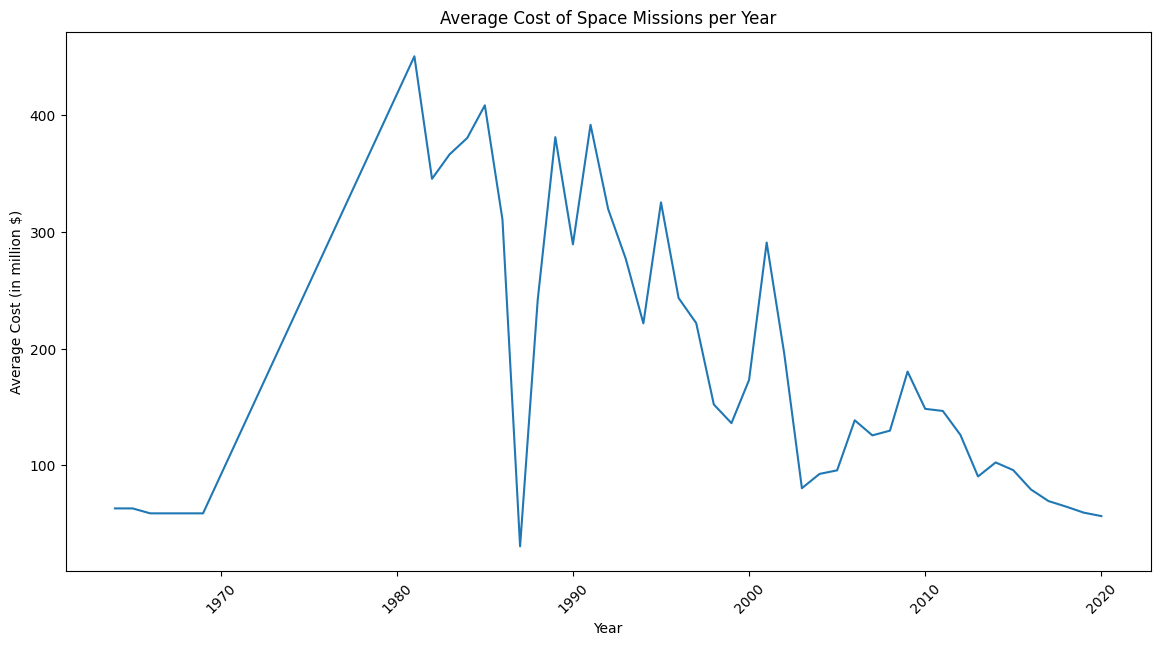

In [ ]:
# Viewing of launches per month
plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Launches', data=launches_per_month)
plt.title('Number of Launches per Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.show()

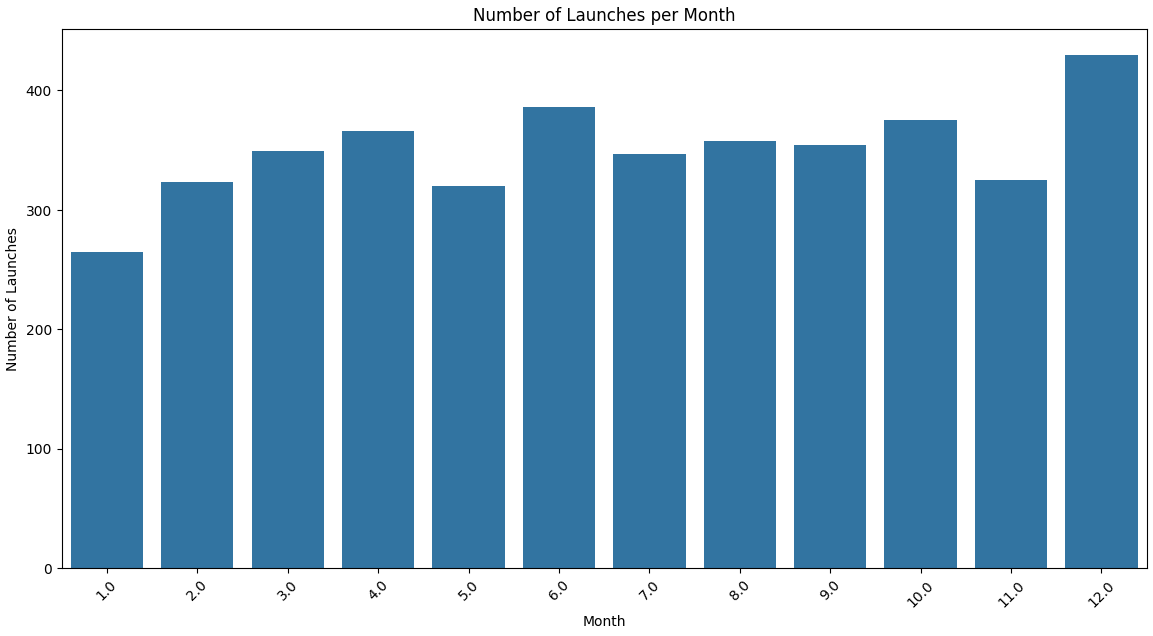

In [ ]:
# Display of the status of missions by year
mission_status_per_year_melted = mission_status_per_year.melt(id_vars='Year', value_vars=['Success', 'Failure'], var_name='Status', value_name='Count')
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Count', hue='Status', data=mission_status_per_year_melted)
plt.title('Mission Success and Failure Counts per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Mission Status')
plt.show()

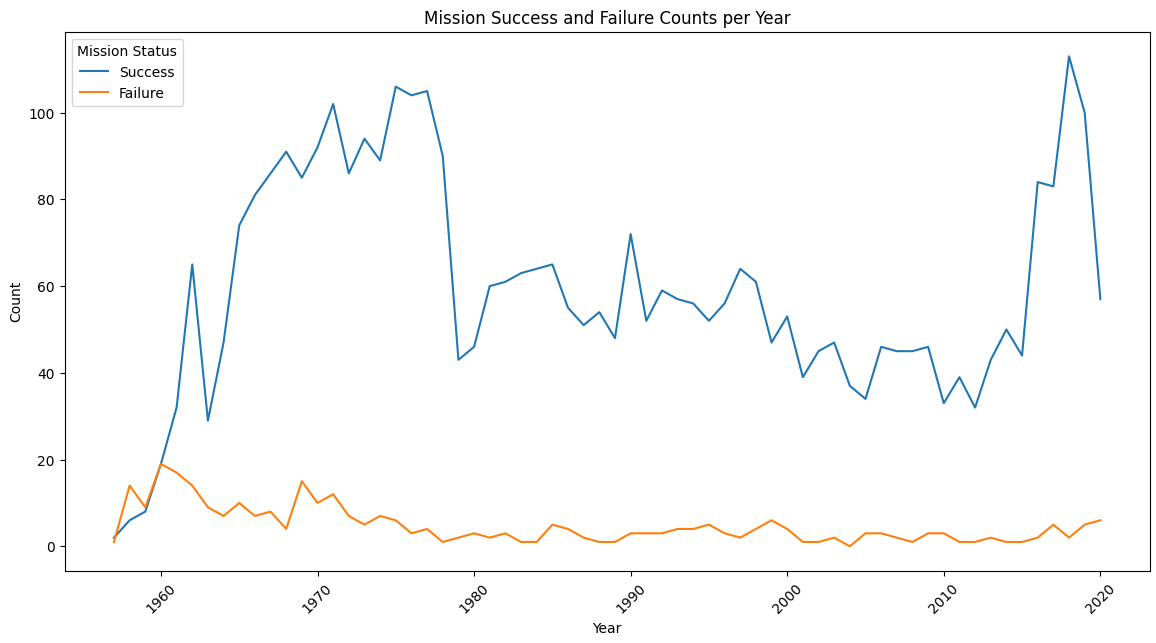

# Act
Based on the graphs generated, we can create a written report detailing the findings and recommendations based on the analyses performed. Below is a   suggested structure for the report.

# Space Mission Launch Pattern and Trend Analysis Report
**Introduction**
This report presents a detailed analysis of trends and patterns in space mission launches. The objective is to improve future launch planning and strategy, identify optimal periods for launching missions, assess cost evolution, and improve mission safety.

**Analysis and Results**
1. Organization with the most launches per year


2. Total number of launches per year


3. Variation in the cost of a space mission over time 4.

4. Most popular months for launches

5. Evolution of mission safety.


# Conclusions and Recommendations.
* Summary of key findings.
* Recommendations for improving launch planning and strategy.
* Suggestions for reducing costs and improving mission safety.